In [41]:
from decifer import (
    DeciferDataset,
    space_group_symbol_to_number,
)
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
import numpy as np

def collate_fn(batch):
    # Separate the fields from the batch
    xrd_q = [sample[0] for sample in batch]
    xrd_iq = [sample[1] for sample in batch]
    cif_names = [sample[2] for sample in batch]
    spacegroup_symbols = [sample[3] for sample in batch]
    
    # Determine max length for padding
    max_len_q = max(len(x) for x in xrd_q)
    max_len_iq = max(len(x) for x in xrd_iq)
    
    # Pad each field with zeros to the max length
    padded_q = [np.pad(x, (0, max_len_q - len(x)), mode="constant") for x in xrd_q]
    padded_iq = [np.pad(x, (0, max_len_iq - len(x)), mode="constant") for x in xrd_iq]
    
    # Convert to tensors for batching
    batch_q = torch.tensor(padded_q, dtype=torch.float32)
    batch_iq = torch.tensor(padded_iq, dtype=torch.float32)
    
    # Return a dictionary of the padded fields
    return batch_q, batch_iq, cif_names, spacegroup_symbols

In [42]:
dataset = DeciferDataset("../data/crystallm/full/serialized/test.h5", ["xrd_disc.q", "xrd_disc.iq", "cif_name", "spacegroup"])
dataloader = DataLoader(dataset, batch_size=32, collate_fn=collate_fn)

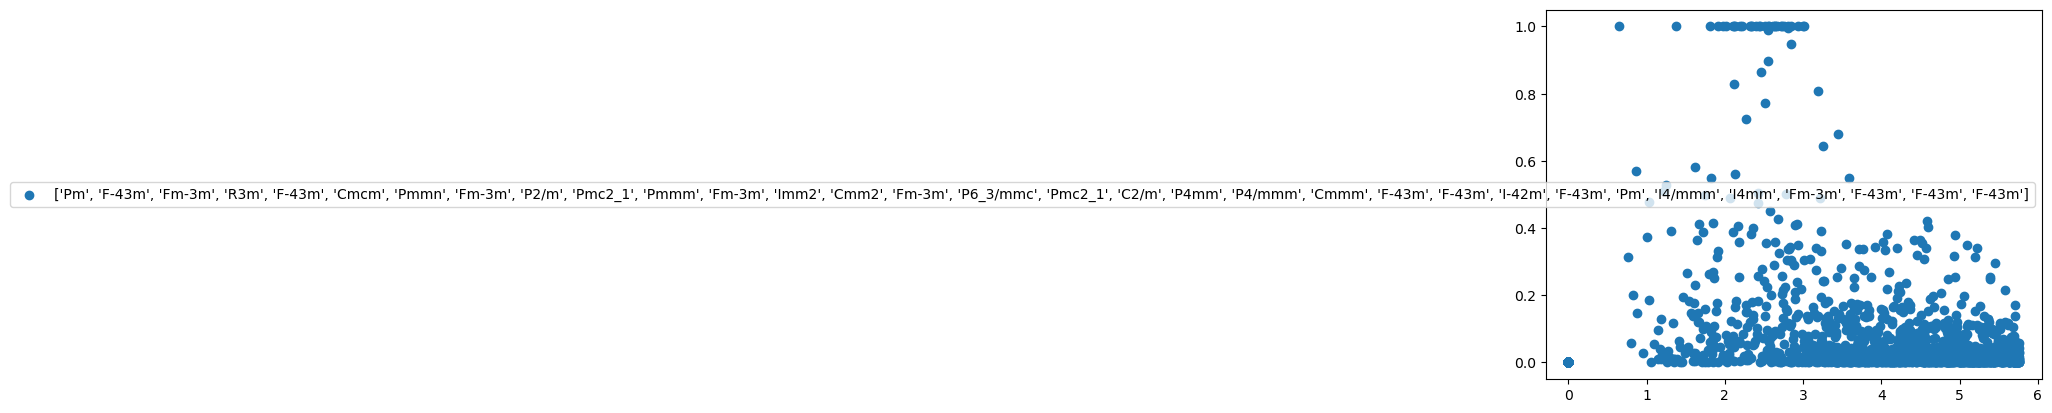

In [57]:
for batch in dataloader:
    plt.scatter(batch[0], batch[1], label=batch[-1])
    plt.legend()
    break